In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
import tensorflow.keras as k
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [ ]:
import os
from glob import glob
from tqdm import tqdm

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import cv2

import random
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations, metrics
from tensorflow.keras import Input, Model
# import tensorflow_addons as tfa

print(f"La version de Tensorflow es {tf.__version__}. Pueden Diferir algunas funciones!")

La version de Tensorflow es 2.17.0. Pueden Diferir algunas funciones!


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

In [ ]:
%%time
root = '/content/drive/MyDrive/train/New/'
def get_images_path():
    images = []
    labels = []


    for d in tqdm(os.listdir(root)):
        path = os.path.join(root, d)
        print(d)
        if os.path.isdir(path):
            iters = int(len(os.listdir(path))/2)
            for i in range(iters):
                file = os.path.join(path, d) + '_' +str(i+1) + '.tif'
                mask = os.path.join(path, d) + '_' +str(i+1) + '_mask.tif'
                images.append(file)
                labels.append(mask)
    return images, labels



def read_images(paths, tipefile):
    images = []

    if tipefile == 'images':
        for f in tqdm(paths):
            img = read_image(f)
            images.append(img)

    else:

        for f in tqdm(paths):
            img = read_mask(f)

            images.append(img)

    imgs1 = np.array(images)


    return imgs1
#
def read_image(path):
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x,(128,128))
    x = x/255.0
    x = x.astype(np.float32)
    return x

def read_mask(path):

    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x,(128,128))
    x = x/255.0
    x = x > 0.5
    x = x.astype(np.float32)
    x = np.expand_dims(x, axis=-1)
    return x

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 12.2 µs


In [ ]:
images, labels = get_images_path()
images = read_images(images , 'images')
masks = read_images(labels, 'masks')

100%|██████████| 14/14 [00:00<00:00, 361.71it/s]


TCGA_CS_4941_19960909
TCGA_CS_4942_19970222
TCGA_CS_4943_20000902
TCGA_CS_4944_20010208
TCGA_CS_5393_19990606
TCGA_CS_5395_19981004
TCGA_CS_5396_20010302
TCGA_CS_6186_20000601
TCGA_CS_6665_20010817
TCGA_CS_6666_20011109
TCGA_CS_6667_20011105
TCGA_HT_A5RC_19990831
TCGA_HT_A61A_20000127
TCGA_HT_A61B_19991127


100%|██████████| 364/364 [00:02<00:00, 135.87it/s]


In [ ]:
def plot_image(image, mask):
   plt.figure(figsize=(7, 7))

   plt.subplot(1, 2, 1)
   plt.imshow(image)
   plt.title('Image')
   plt.subplot(1, 2, 2)
   plt.imshow(mask)
   plt.title('Mask')

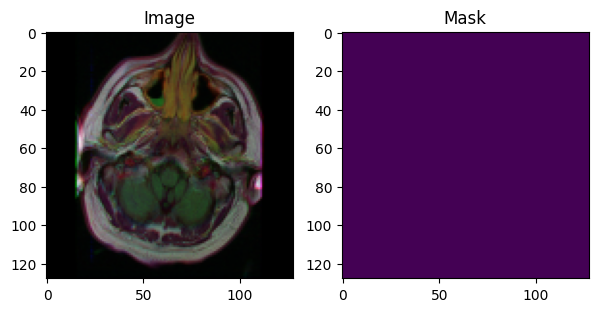

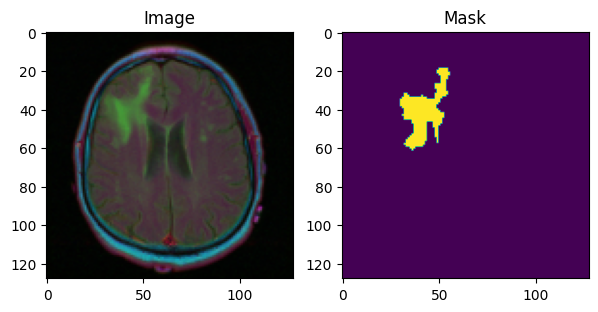

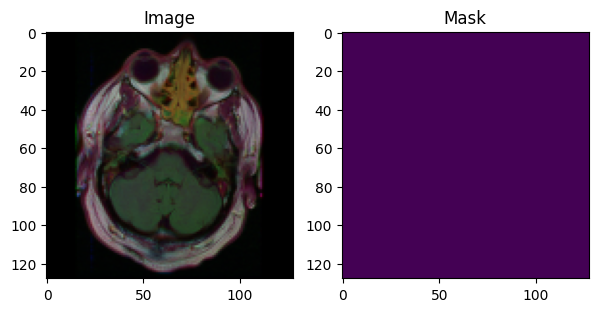

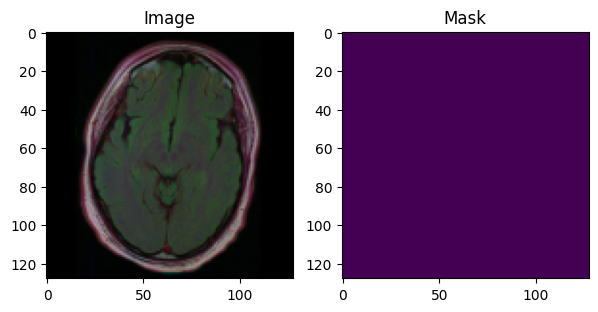

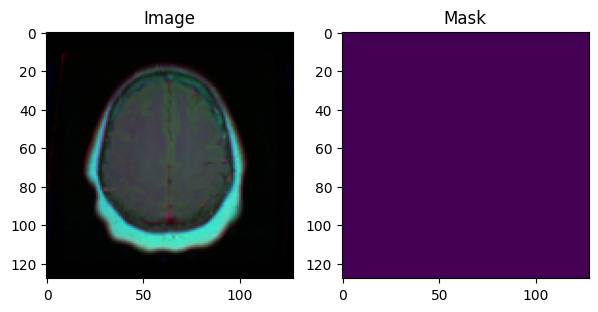

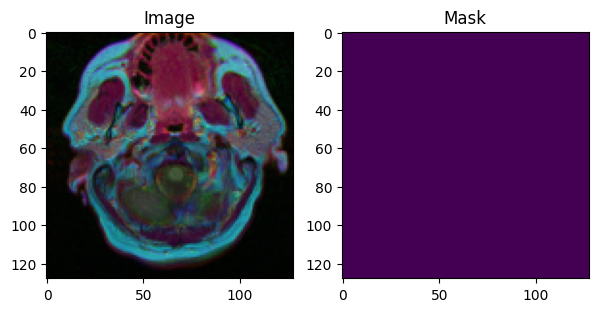

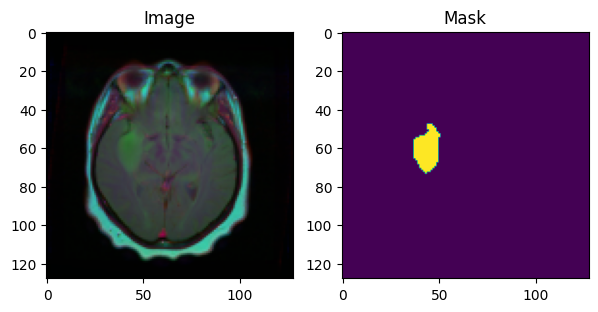

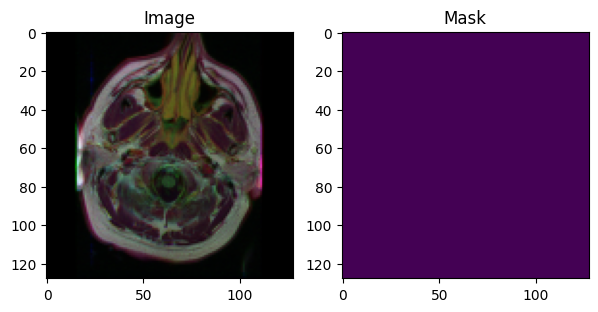

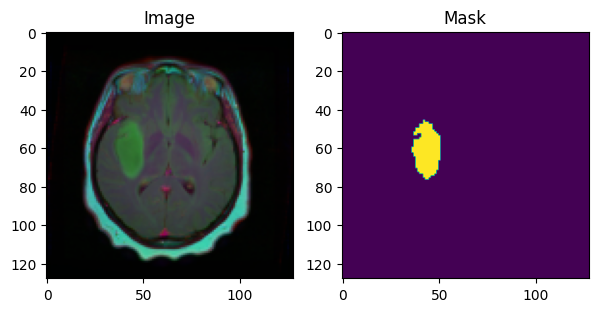

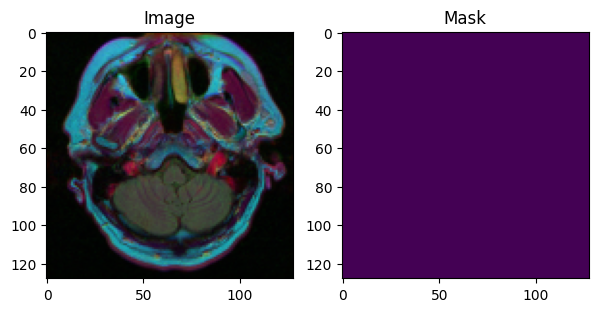

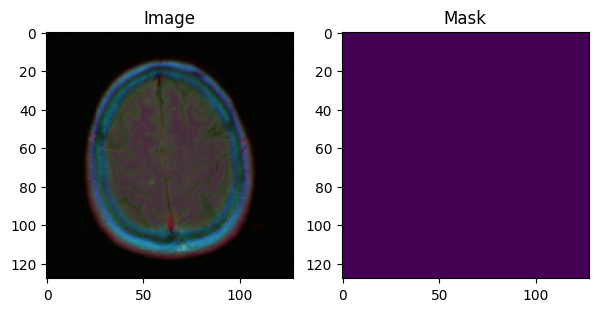

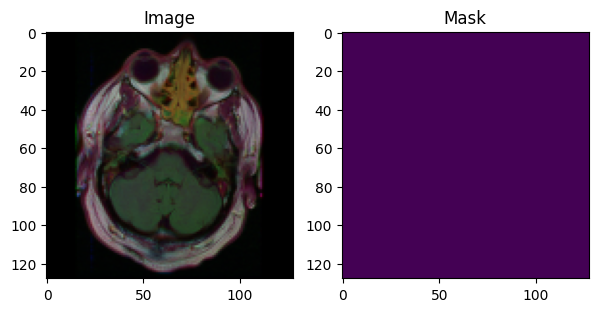

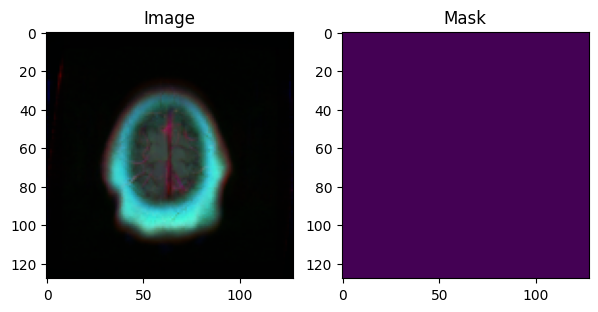

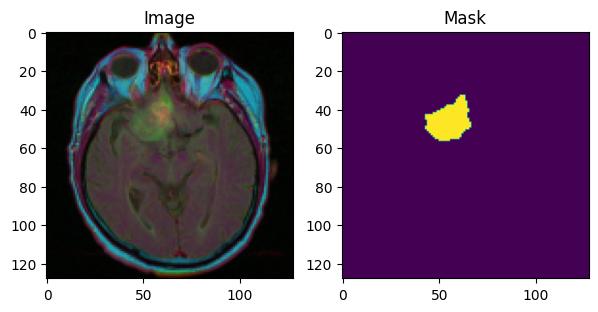

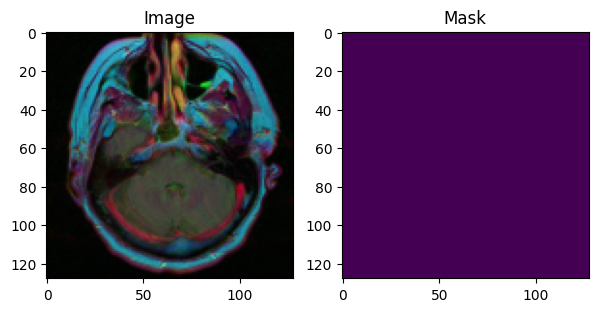

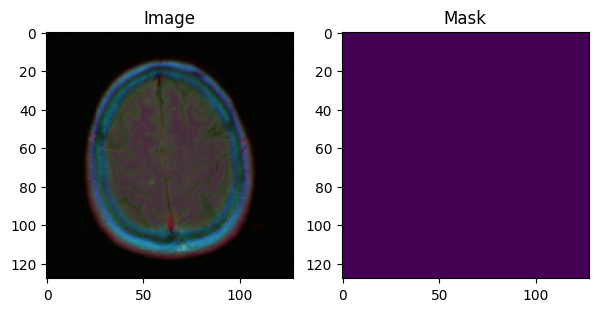

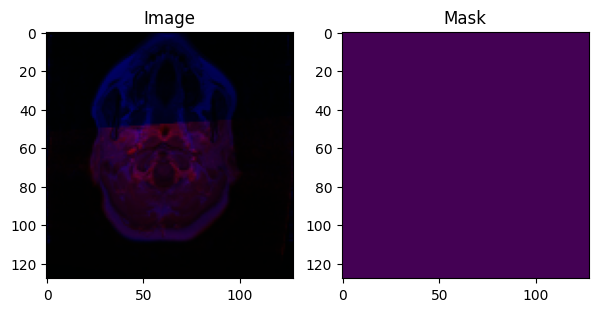

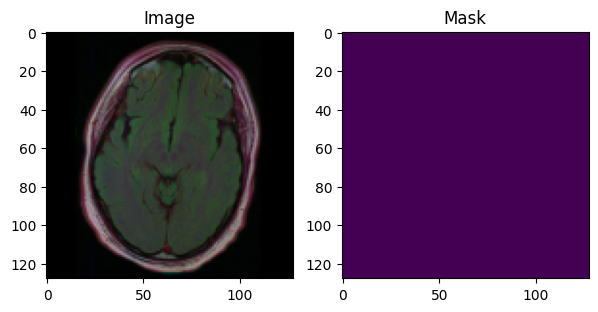

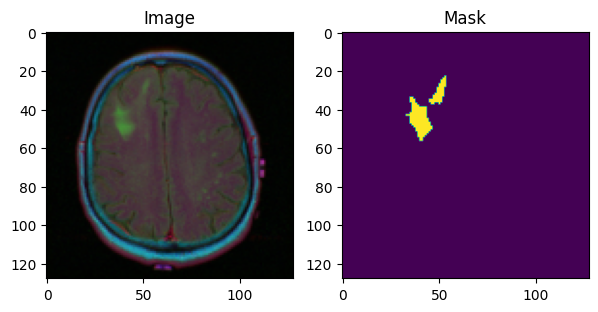

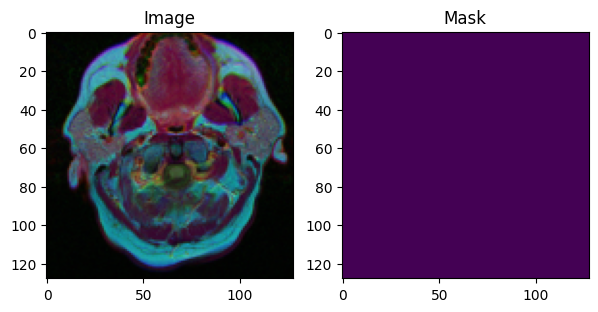

In [ ]:
l = [random.randint(0,50) for _ in range(20)]

for i in l:
    plot_image(images[i], masks[i])

In [ ]:
instance = []
for i in range(masks.shape[0]):

    if sum(sum(masks[i])) == 0:
        instance.append('neg')
    else:
        instance.append('pos')

In [ ]:
count = 0
for i in range(len(instance)):
    if instance[i] == 'pos':
        count += 1
print('Número de casos positivos: ', count)

count = 0
for i in range(len(instance)):
    if instance[i] == 'neg':
        count += 1
print('Número de casos negativos: ', count)

Número de casos positivos:  141
Número de casos negativos:  223


In [ ]:
n = images.shape[0]

images_pos = []
masks_pos = []

for i in range(n):
    if instance[i] == 'pos':
        images_pos.append(images[i])
        masks_pos.append(masks[i])

images_pos = np.array(images_pos)
masks_pos = np.array(masks_pos)

print('Número de imágenes ',images_pos.shape)
print('Número de mascaras ',masks_pos.shape)


Número de imágenes  (141, 128, 128, 3)
Número de mascaras  (141, 128, 128, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images_pos, masks_pos, test_size = .5, random_state = 32)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .50, random_state = 288)

In [ ]:
print('#'*10 + ' Images ' + '#'*10)
print('X_train shape: ',  X_train.shape)
print('X_val shape:   ',  X_val.shape)
print('X_test shape:  ',  X_test.shape)
print('\n')
print('#'*10 + ' Masks ' + '#'*10)
print('y_train shape: ',  y_train.shape)
print('y_val shape:   ',  y_val.shape)
print('y_test shape:  ',  y_test.shape)

########## Images ##########
X_train shape:  (70, 128, 128, 3)
X_val shape:    (36, 128, 128, 3)
X_test shape:   (35, 128, 128, 3)


########## Masks ##########
y_train shape:  (70, 128, 128, 1)
y_val shape:    (36, 128, 128, 1)
y_test shape:   (35, 128, 128, 1)


In [ ]:
from tensorflow.keras import layers

In [ ]:
import tensorflow as tf
import numpy as np

class MaxPoolingWithArgmax2D(tf.Module):
    def __init__(self, pool_size=(2, 2), padding="VALID"):
        self.pool_size = pool_size
        self.padding = padding

    def __call__(self, x):
        # Perform max-pooling
        pool_output, indices = tf.nn.max_pool_with_argmax(
            x, ksize=[1, *self.pool_size, 1], strides=[1, *self.pool_size, 1], padding=self.padding
        )
        return pool_output, indices

# Example usage:
input_tensor = tf.constant(np.random.rand(1, 4, 4, 3), dtype=tf.float32)
pool_layer = MaxPoolingWithArgmax2D(pool_size=(2, 2))
pooled_output, argmax_indices = pool_layer(input_tensor)

# You can now use the pooled_output and argmax_indices for unpooling or other operations.


In [ ]:
class MaxUnpooling2D(tf.Module):
     def __init__(self, size=(2, 2), **kwargs):
                super(MaxUnpooling2D, self).__init__(**kwargs)
                self.size = size
     def call(self, inputs, output_shape=None):
# one is pool and one is mask\n",
                updates, mask = inputs[0], inputs[1]
                with tf.variable_scope(self.name):
                      masks = K.cast(mask, 'int32')
                input_shape = tf.shape(updates, out_type='int32')     # it gives a dynamic shape of a given tensor. \n",
#  calculation new shape\n",
                if output_shape is None:
                        output_shape = (
                               input_shape[0],
                               input_shape[1]*self.size[0],
                               input_shape[2]*self.size[1],
                               input_shape[3])
                self.output_shape1 = output_shape
                one_like_mask = K.ones_like(mask, dtype='int32')
                batch_shape = K.concatenate([[input_shape[0]], [1], [1], [1]], axis=0)
                batch_range = K.reshape(tf.range(output_shape[0], dtype='int32'),shape=batch_shape)
                b = one_like_mask * batch_range
                y = mask // (output_shape[2] * output_shape[3])
                x = (mask // output_shape[3]) % output_shape[2]
                feature_range = tf.range(output_shape[3], dtype='int32')
                f = one_like_mask * feature_range
# transpose indices & reshape update values to one dimension\n",
                updates_size = tf.size(updates)       # Prints the number of elements in the updates\n",
                indices = K.transpose(K.reshape(K.stack([b, y, x, f]), [4, updates_size]))
                values = K.reshape(updates, [updates_size])
                ret = tf.scatter_nd(indices, values, output_shape)
                return ret

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation

def segnet(input_shape=(128, 128, 3), num_classes=1):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(64, (3, 3), padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool2)
    conv3 = Conv2D(64, (3, 3), padding='same')(up1)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)

    up2 = UpSampling2D(size=(2, 2))(conv3)
    conv4 = Conv2D(num_classes, (3, 3), padding='same')(up2)
    conv4 = BatchNormalization()(conv4)
    output = Activation('softmax')(conv4)

    model = Model(inputs=inputs, outputs=output)
    return model

model = segnet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 1)         │             577 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128, 128, 1)         │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128, 128, 1)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,045 (590.02 KB)

 Trainable params: 150,531 (588.01 KB)

 Non-trainable params: 514 (2.01 KB)

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_1 = model.fit(X_train,
                          y_train,
                          verbose = 1,
                          epochs = 10,
                          validation_data = (X_val, y_val))
model.save("/content/drive/MyDrive/Brain_Tumor/UNet_BrainTumor.h5")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 128, 128, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.0274 - loss: 0.7627 - val_accuracy: 0.0312 - val_loss: 0.7058
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.0275 - loss: 0.7026 - val_accuracy: 0.0312 - val_loss: 0.6988
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.0273 - loss: 0.6873 - val_accuracy: 0.0312 - val_loss: 0.7003
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.0287 - loss: 0.6689 - val_accuracy: 0.0312 - val_loss: 0.7065
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.0270 - loss: 0.6655 - val_accuracy: 0.0312 - val_loss: 0.7249
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.0294 - loss: 0.6580 - val_accuracy: 0.0312 - val_loss: 0.7437
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.0280 - loss: 0.6473 - val_accuracy: 0.0312 - val_loss: 0.7611
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.0295 - loss: 0.6425 - val_accuracy: 0.0312 - val_loss: 0.7838
Epoch 9/10
3/3 ━━━━

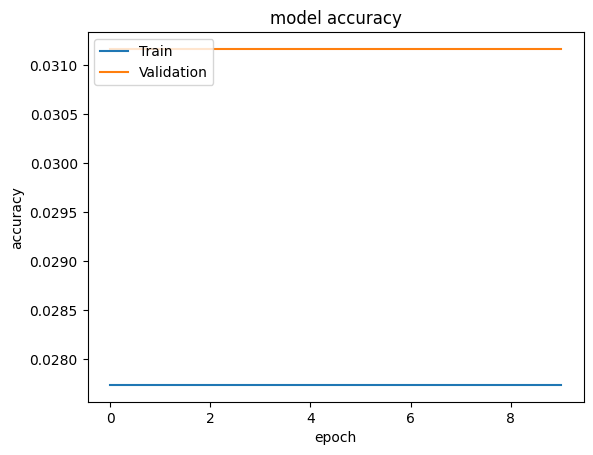

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

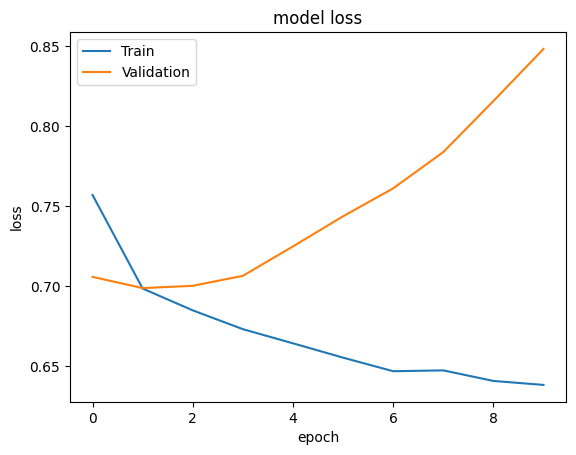

In [ ]:
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pickle

In [ ]:
with open("/content/drive/MyDrive/Brain_Tumor/untitled.pkl", "wb") as f:
    pickle.dump(history_1,f)

In [ ]:
def preprocess_image(image_path, target_size=(128, 128)):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, target_size)  # Resize the image to the target size

    # Convert the grayscale image to 3 channels by duplicating the single channel
    img = np.stack((img,)*3, axis=-1)

    img = img.astype(np.float32) / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [ ]:
def segment_brain_tumor(image_path):
    # Preprocess the image
    preprocessed_img = preprocess_image(image_path)

    # Predict the mask using the model
    prediction = model.predict(preprocessed_img)
    prediction = np.squeeze(prediction)  # Remove batch dimension
    prediction = (prediction > 0.5).astype(np.uint8)  # Thresholding to get binary mask

    # Resize prediction to original image size if needed
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    prediction_resized = cv2.resize(prediction, (original_img.shape[1], original_img.shape[0]))

    return original_img, prediction_resized

In [ ]:
def visualize_segmentation(image_path):
    original_img, predicted_mask = segment_brain_tumor(image_path)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Predicted Mask")
    plt.imshow(predicted_mask, cmap='gray')
    plt.axis('off')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


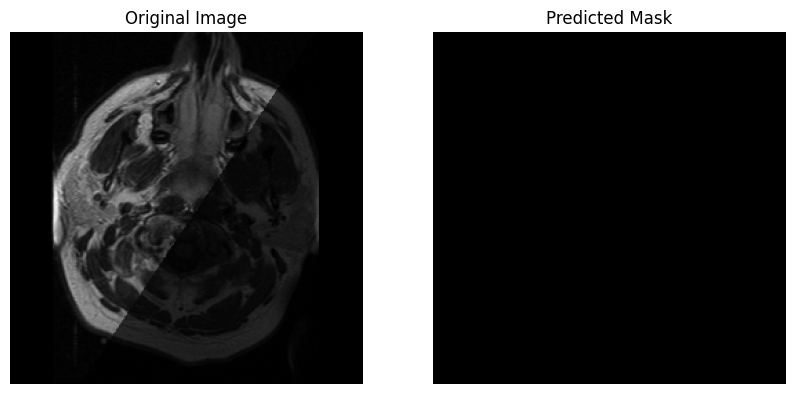

In [ ]:
image_path = '/content/drive/MyDrive/train/New/TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif'
visualize_segmentation(image_path)